In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
chunksize = 20000
df = pd.read_csv('USCensus1990.data.txt', chunksize = chunksize, iterator = True)
data = pd.concat(df, ignore_index = True)

In [3]:
data.shape 

(2458285, 69)

In [4]:
data.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,10000,5,0,1,0,0,5,3,2,2,...,0,5,0,2,1,1,0,11,1,0
1,10001,6,1,1,0,0,7,5,2,2,...,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,...,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,...,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,5,6,0


In [4]:
df = data.sample(frac = 0.004, random_state = 0)

In [5]:
df.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
2186323,2196323,7,11,1,0,0,3,4,2,2,...,0,6,0,2,1,1,0,14,1,0
814017,824017,5,1,1,0,0,2,4,2,2,...,0,1,0,2,1,1,0,15,1,0
204515,214515,3,1,1,0,0,1,3,2,2,...,0,3,0,2,1,1,0,10,1,0
2383962,2393962,4,11,1,0,0,1,3,2,2,...,0,3,0,1,1,1,0,14,1,0
1692368,1702368,3,0,1,0,0,0,0,2,2,...,3,0,0,0,2,2,0,10,7,0


In [6]:
df.shape

(9833, 69)

In [7]:
df.drop(['caseid'], axis = 1, inplace = True)

In [8]:
df.shape

(9833, 68)

In [9]:
x = df.iloc[:,:].values

In [10]:
x.shape

(9833, 68)

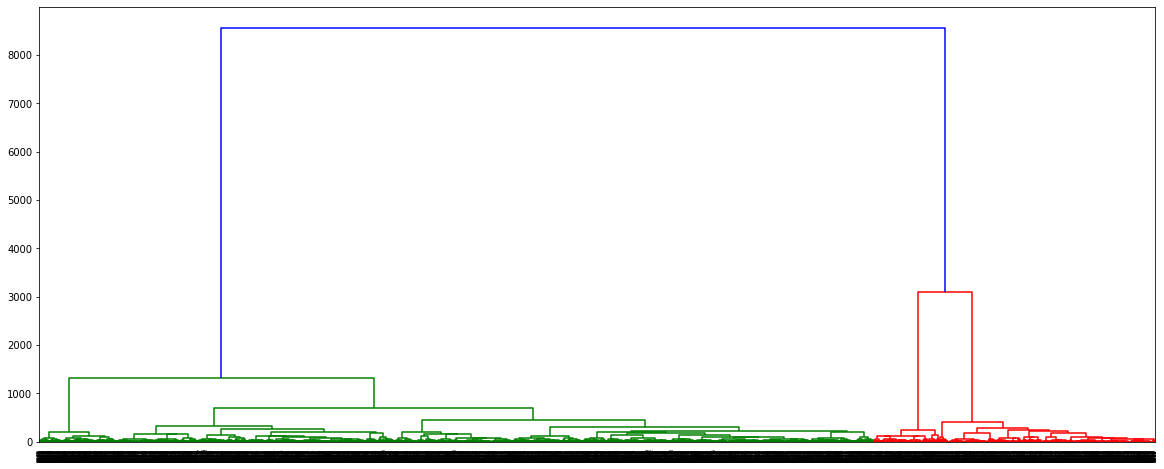

In [11]:
fig, ax = plt.subplots(figsize = (20,8))
dendrogram(linkage(x,'ward'))
#plt.axhline(y = )
plt.show()

In [12]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

In [13]:
len(y_hc)

9833